In [1]:
from eryn.backends import HDFBackend

import matplotlib.pyplot as plt
import numpy as np
from corner import corner
import os
os.chdir("samples")  # Change to samples directory

In [2]:
a_true = 5e-21
f_true = 1e-3
fdot_true = 1e-8  

true_vals_log_10 = np.log10(np.array([a_true,f_true,fdot_true]))
ndim = len(true_vals_log_10)
ntemp = 5
burn_extra = 200

In [3]:
# read in data
data_file = "sample_parameters_tempering.h5"
reader_PT = HDFBackend(data_file,read_only = True)

samples_PT_log_10 = [np.log10(reader_PT.get_chain()['model_0'][burn_extra:][:,i].reshape(-1,ndim)) 
                    for i in range(ntemp)]  # Take true chain]

In [4]:
samples_PT_log_10[0].shape

(30000, 3)

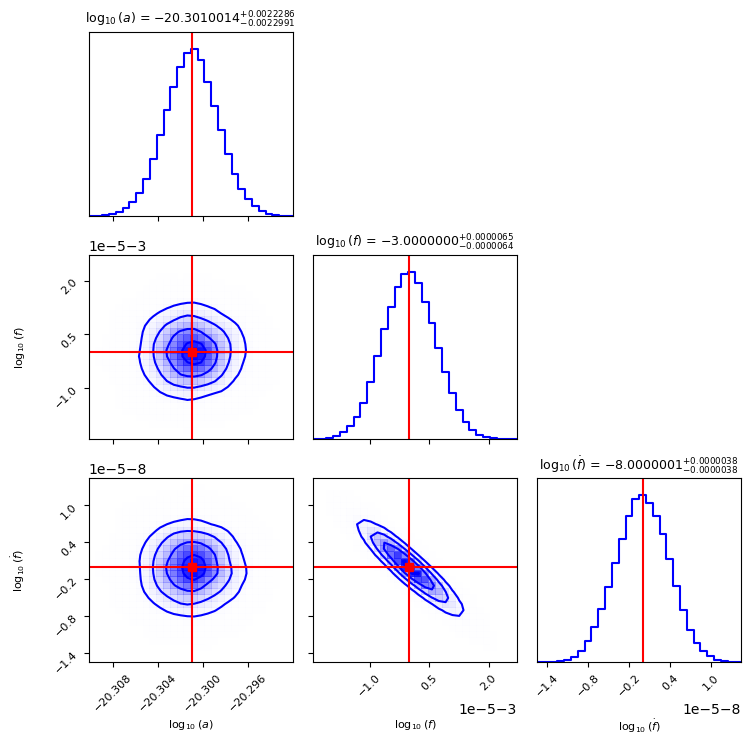

In [5]:
# Construct corner plot

params =[r"$\log_{10}(a)$", r"$\log_{10}(f)$", r"$\log_{10}(\dot{f})$"]

N_param = len(params)

import corner

figure = corner.corner(samples_PT_log_10[0],bins = 30, color = 'blue',plot_datapoints=False,smooth1d=True,
                       labels=params, 
                       label_kwargs = {"fontsize":8},set_xlabel = {'fontsize': 12}, set_ylabel = {'fontsize':12},
                       show_titles=True, title_fmt='.7f',title_kwargs={"fontsize": 9},smooth = True)


axes = np.array(figure.axes).reshape((ndim, ndim))
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(true_vals_log_10[i], color="r")
    
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals_log_10[yi], color="r")
        ax.axvline(true_vals_log_10[xi],color= "r")
        ax.plot(true_vals_log_10[xi], true_vals_log_10[yi], "sr")
        
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=8)
    
plt.tight_layout()


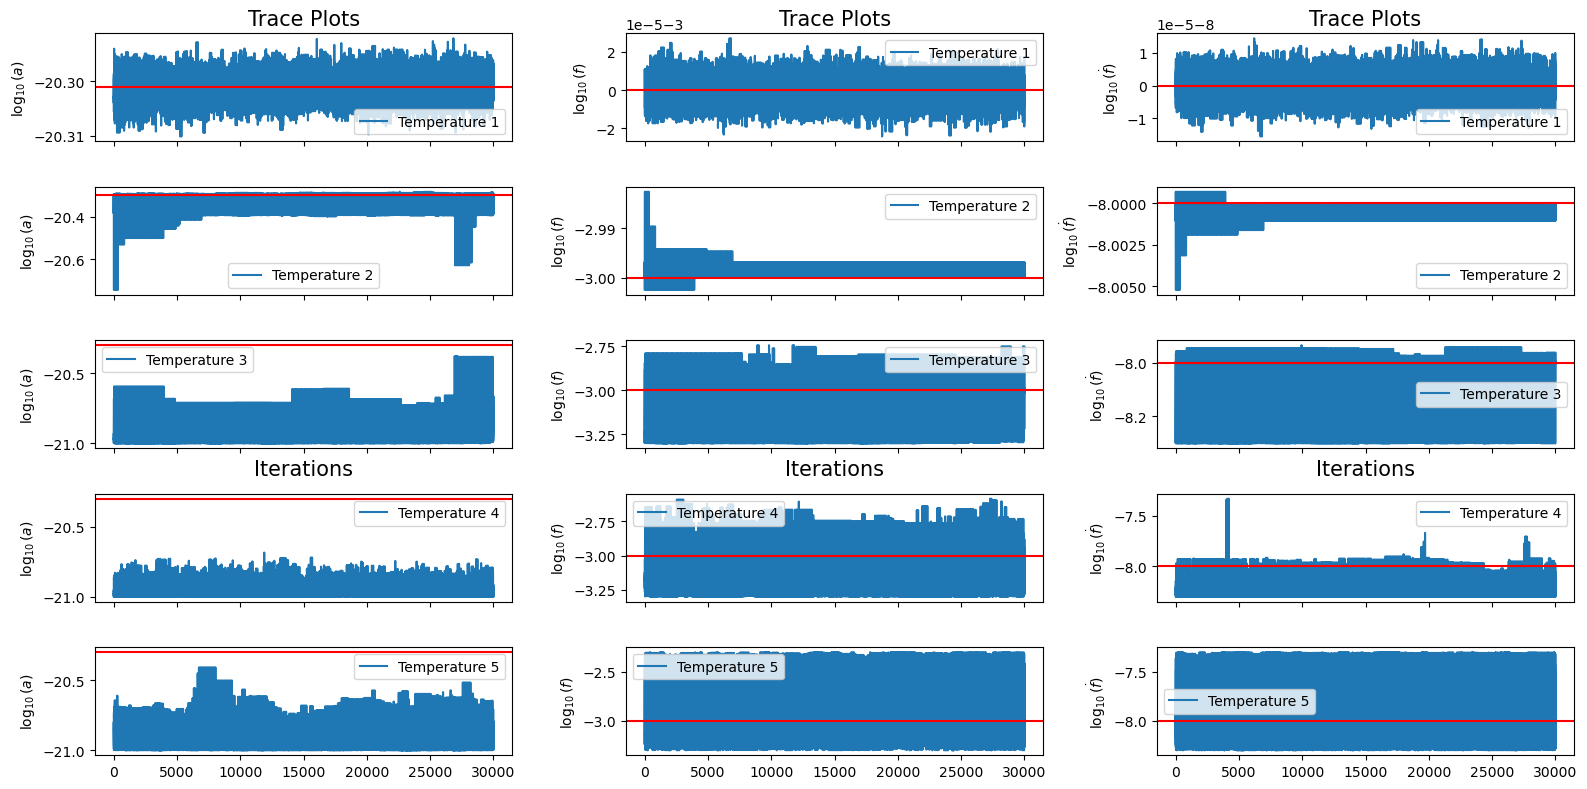

In [6]:
# Trace plots

fig, ax = plt.subplots(ntemp,ndim, sharex = True, figsize = (16,8))
for i in range(0,ntemp):
    for j in range(0,ndim):
        ax[i][j].plot(samples_PT_log_10[i][:,j],label = "Temperature {0}".format(i + 1))
        ax[i][j].set_ylabel(params[j],fontsize = 10)
        ax[i][j].axhline(true_vals_log_10[j],color = 'red')
        ax[i][j].legend()
for column in range(3):        
    ax[0][column].set_title("Trace Plots", fontsize = 15)
    ax[2][column].set_xlabel("Iterations", fontsize = 15)

plt.tight_layout()


In [7]:
# Extract summary statistics 

samples = [10**samples_PT_log_10[0][:,j] for j in range(0,ndim)]

mean_a = np.mean((samples[0]))
mean_f = np.mean(samples[1])
mean_fdot = np.mean(samples[2])

sd_a = np.std(samples[0])
sd_f = np.std(samples[1])
sd_fdot = np.std(samples[2])

print("Recovered estimates of parameters")
print("")
print("a = ",mean_a)
print("f = ",mean_f)
print("fdot = ",mean_fdot)
print("")
print("Precision in which we can measure them")
print("")
print("Delta a = ",sd_a)
print("Delta f = ",sd_f)
print("Delta fdot = ",sd_fdot)

Recovered estimates of parameters

a =  5.0001184133532116e-21
f =  0.0010000001505435375
fdot =  9.99999870536965e-09

Precision in which we can measure them

Delta a =  2.6308891064408393e-23
Delta f =  1.4749823517699013e-08
Delta fdot =  8.643261039727984e-14
